<a href="https://colab.research.google.com/github/adrianb896/CreatingModels/blob/main/AdrianBernardino_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Homework 2***

https://colab.research.google.com/drive/1kDG3K2PA96XtL3-Froqcq6utzbsKQ1g7?usp=sharing

*   What are the inputs?
The inputs are x_train, y_train, x_test, y_test to determine the images training and labels training.
*   What are the labels?
The labels include accuracy, epochs, losses
These are determined to validate the datasets and results of the 20 epochs of training the network.
*   What are the dimensions of this dataset?
The dimensions for the this dataset contain 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is then split into 50,000 training images and 10,000 testing images. However, for this dataset we are plotting the first 25 images from the training set.



In [ ]:
import numpy as py
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import backend
from keras.datasets.cifar import load_batch
from tensorflow.python.util.tf_export import keras_export
from keras import datasets, layers, models

In [ ]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# converting integers to floats
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

Train: x=(50000, 32, 32, 3), y=(50000, 1)
Test: x=(10000, 32, 32, 3), y=(10000, 1)


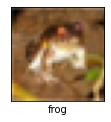

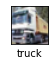

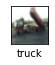

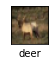

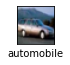

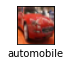

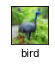

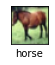

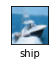

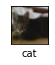

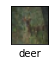

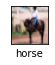

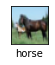

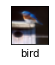

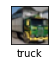

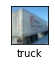

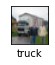

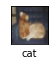

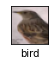

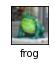

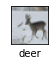

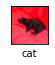

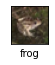

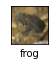

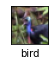

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  # cifar labels are made into arrays
  # index created for this specific reason
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
  plt.show()

In [ ]:
from keras import activations
import keras.layers.advanced_activations as activation_layers
from keras.utils import generic_utils

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation= 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 75,648
Trainable params: 75,648
Non-trai

ReLU function was chosen based upon being able to modify the default parameters into different numbers or even non-zero thresholds.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Sigmoid function was chosen since it has accurate display of similar activation function like Softmax. The sigmoid function always will return a value between 0 and 1. 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activations.sigmoid))
model.add(layers.Dense(10))

Softmax function was chosen since it can be used for the last layer of the model. This is because softmax results in probability distribution.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activations.softmax))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 117s 74ms/step - loss: 2.1824 - accuracy: 0.1561 - val_loss: 2.0527 - val_accuracy: 0.2052
Epoch 2/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.9731 - accuracy: 0.2224 - val_loss: 1.8888 - val_accuracy: 0.2712
Epoch 3/20
1563/1563 [==============================] - 115s 73ms/step - loss: 1.8496 - accuracy: 0.2864 - val_loss: 1.7781 - val_accuracy: 0.3210
Epoch 4/20
1563/1563 [==============================] - 110s 70ms/step - loss: 1.7450 - accuracy: 0.3285 - val_loss: 1.6940 - val_accuracy: 0.3487
Epoch 5/20
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6411 - accuracy: 0.3638 - val_loss: 1.5932 - val_accuracy: 0.3835
Epoch 6/20
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5510 - accuracy: 0.4013 - val_loss: 1.5411 - val_accuracy: 0.4163
Epoch 7/20
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4833 - accuracy: 0.4363 - val_loss: 1

In [ ]:
def plotLoss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('evaluating model loss and accuracy')
    plt.ylabel('loss & accuracy')
    plt.xlabel('epoch')
    plt.legend(['xtrain', 'val_loss', 'ytrain', 'val_acc' ], loc='upper right')
    plt.show()

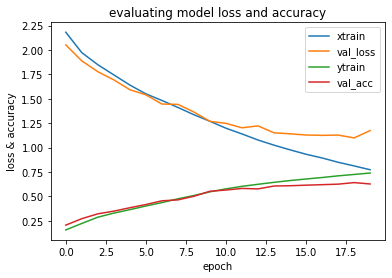

In [ ]:
plotLoss(history)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.1744780540466309, 0.6269999742507935]


In [ ]:
from keras.optimizers import gradient_descent_v2

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

sgd = gradient_descent_v2.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 121s 77ms/step - loss: 1.5051 - accuracy: 0.4609 - val_loss: 1.1860 - val_accuracy: 0.5767
Epoch 2/15
1563/1563 [==============================] - 119s 76ms/step - loss: 1.0618 - accuracy: 0.6227 - val_loss: 1.1165 - val_accuracy: 0.6059
Epoch 3/15
1563/1563 [==============================] - 121s 77ms/step - loss: 0.8548 - accuracy: 0.7022 - val_loss: 1.0075 - val_accuracy: 0.6597
Epoch 4/15
1563/1563 [==============================] - 121s 77ms/step - loss: 0.6979 - accuracy: 0.7542 - val_loss: 1.0290 - val_accuracy: 0.6615
Epoch 5/15
1563/1563 [==============================] - 121s 77ms/step - loss: 0.5546 - accuracy: 0.8067 - val_loss: 1.0655 - val_accuracy: 0.6653
Epoch 6/15
1563/1563 [==============================] - 120s 77ms/step - loss: 0.4174 - accuracy: 0.8519 - val_loss: 1.2743 - val_accuracy: 0.6445
Epoch 7/15
1563/1563 [==============================] - 121s 77ms/step - loss: 0.3236 - accuracy: 0.8862 - val_loss: 1

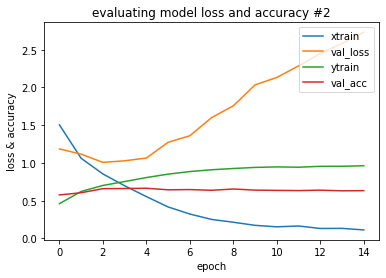

In [ ]:
plotLoss(history)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.7315430641174316, 0.6331999897956848]


In [ ]:
from keras.metrics import losses_utils
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape=(512,)))
# Dropout layer added here
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalHinge(reduction=losses_utils.ReductionV2.AUTO), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
1563/1563 [==============================] - 320s 204ms/step - loss: 0.1100 - accuracy: 0.1007 - val_loss: 0.1100 - val_accuracy: 0.1000
Epoch 2/4
1563/1563 [==============================] - 320s 205ms/step - loss: 0.1100 - accuracy: 0.0982 - val_loss: 0.1100 - val_accuracy: 0.1000
Epoch 3/4
1563/1563 [==============================] - 319s 204ms/step - loss: 0.1100 - accuracy: 0.1011 - val_loss: 0.1100 - val_accuracy: 0.1000
Epoch 4/4
1563/1563 [==============================] - 329s 211ms/step - loss: 0.1100 - accuracy: 0.0981 - val_loss: 0.1100 - val_accuracy: 0.1000


In [ ]:
def plotLoss(history):  
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    plt.show()

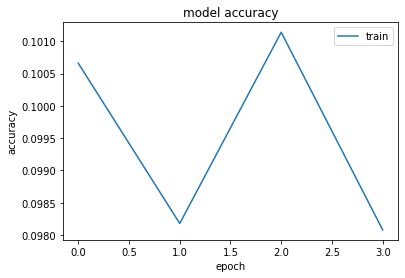

In [ ]:
plotLoss(history)

These changes were able to improve the models accuracy since adding different types of activation function layers. Being able to see the difference in accuracy and loss helps to determine for 1 additional hidden layer, 1 different optimizer, and 1 different loss function. These strategies coherently were able to help with runtime speed as well which was one of the challenges that we can face while implementing different sizes. The last training and testing had layers the sizes of 128, 256, and 512. Because of the large amount of neurons, waittime can be roughly 5 to 6 minutes per epoch. 
